# MLP

In [1]:
from pyNNRW.mlp import *

Load data and create nn

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, t_train), (x_test, t_test) = mnist.load_data()
n_classes = len(set(t_train))
x_train = x_train.astype(np.float32) / 255.
x_train = x_train.reshape(-1, 28**2)
x_test = x_test.astype(np.float32) / 255.
x_test = x_test.reshape(-1, 28**2)
t_train = to_categorical(t_train, n_classes).astype(np.float32)
t_test = to_categorical(t_test, n_classes).astype(np.float32)

clf = MLP(input_size = x_train.shape[1], hidden_size=50, output_size=t_train.shape[1])

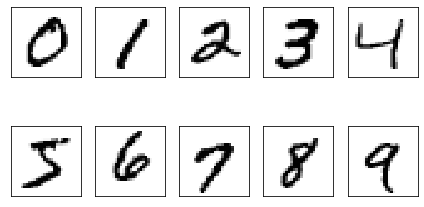

In [4]:
import matplotlib.pyplot as plt

# Visualize the first digit of each class
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True) 
ax = ax.flatten()
for i in range(10):
    img = x_train[t_train.argmax(axis=1) == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

Gradient Check

In [5]:
x_batch = x_train[:5]
t_batch = t_train[:5]

clf.gradient_check(x_batch, t_batch)

W1:1.6709221030084152e-10
b1:0.0005671910346668085
W2:5.260333845427678e-08
b2:0.0820995183692596


train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.7961833333333334, 0.7984
train acc, test acc | 0.8764666666666666, 0.8804
train acc, test acc | 0.8986, 0.9001
train acc, test acc | 0.908, 0.9075
train acc, test acc | 0.9147333333333333, 0.9148
train acc, test acc | 0.9175166666666666, 0.9192
train acc, test acc | 0.9236, 0.9252
train acc, test acc | 0.92715, 0.9273
train acc, test acc | 0.93025, 0.9302
train acc, test acc | 0.933, 0.9331
train acc, test acc | 0.9358166666666666, 0.934
train acc, test acc | 0.9376166666666667, 0.9366
train acc, test acc | 0.9405333333333333, 0.9381
train acc, test acc | 0.9417333333333333, 0.9388
train acc, test acc | 0.9441833333333334, 0.9409
train acc, test acc | 0.94615, 0.9445
train acc, test acc | 0.9475666666666667, 0.9445
train acc, test acc | 0.9491, 0.9463
train acc, test acc | 0.95075, 0.9476
train acc, test acc | 0.9527, 0.9488
train acc, test acc | 0.9531333333333334, 0.949
train acc, test acc | 0.9546, 0.9507
train

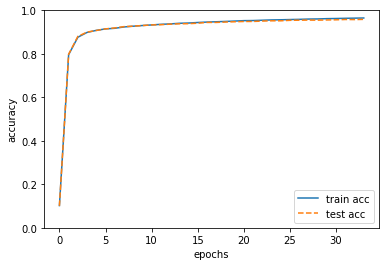

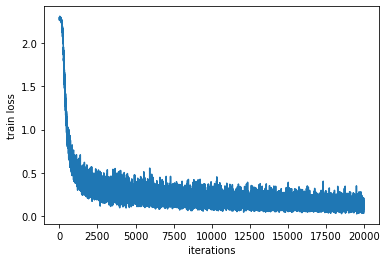

In [6]:
train_loss_list, train_acc_list, test_acc_list = clf.train(x_train, t_train, x_test, t_test, iters = 20000)